In [1]:
!pip install tld

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 2.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
from tld import get_tld
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [3]:
data = "https://raw.githubusercontent.com/Jcharis/Machine-Learning-In-Julia-JCharisTech/master/urldata.csv"
urldata  = pd.read_csv(data)
urldata.head()

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


In [4]:
len(urldata)

420464

In [5]:
urldata.shape

(420464, 2)

In [6]:
urldata.isnull().sum()

url      0
label    0
dtype: int64

In [7]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420464 entries, 0 to 420463
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     420464 non-null  object
 1   label   420464 non-null  object
dtypes: object(2)
memory usage: 6.4+ MB


In [8]:
#Length of URL
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))

#Hostname Length
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))

#Path Length
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
urldata['tld'] = urldata['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

urldata['tld_length'] = urldata['tld'].apply(lambda i: tld_length(i))

In [9]:
urldata.head()

,url,label,url_length,hostname_length,path_length,fd_length,tld,tld_length
0,diaryofagameaddict.com,bad,22,0,22,0,None,-1
1,espdesign.com.au,bad,16,0,16,0,None,-1
2,iamagameaddict.com,bad,18,0,18,0,None,-1
3,kalantzis.net,bad,13,0,13,0,None,-1
4,slightlyoffcenter.net,bad,21,0,21,0,None,-1


In [10]:
urldata = urldata.drop("tld",1)

<ipython-input-10-4fbc22699343>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  urldata = urldata.drop("tld",1)


In [11]:
urldata.head()

,url,label,url_length,hostname_length,path_length,fd_length,tld_length
0,diaryofagameaddict.com,bad,22,0,22,0,-1
1,espdesign.com.au,bad,16,0,16,0,-1
2,iamagameaddict.com,bad,18,0,18,0,-1
3,kalantzis.net,bad,13,0,13,0,-1
4,slightlyoffcenter.net,bad,21,0,21,0,-1


In [12]:
#Count Features
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [13]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

In [14]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

In [15]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))

In [16]:
urldata.head()

,url,label,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,diaryofagameaddict.com,bad,22,0,22,0,-1,0,0,0,0,1,0,0,0,0,0,21,0
1,espdesign.com.au,bad,16,0,16,0,-1,0,0,0,0,2,0,0,0,0,0,14,0
2,iamagameaddict.com,bad,18,0,18,0,-1,0,0,0,0,1,0,0,0,0,0,17,0
3,kalantzis.net,bad,13,0,13,0,-1,0,0,0,0,1,0,0,0,0,0,12,0
4,slightlyoffcenter.net,bad,21,0,21,0,-1,0,0,0,0,1,0,0,0,0,0,20,0


In [17]:
import re

#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
urldata['use_of_ip'] = urldata['url'].apply(lambda i: having_ip_address(i))

#If url is shortened
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
urldata['short_url'] = urldata['url'].apply(lambda i: shortening_service(i))

In [18]:
urldata.head(10)

,url,label,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,diaryofagameaddict.com,bad,22,0,22,0,-1,0,0,0,...,1,0,0,0,0,0,21,0,1,-1
1,espdesign.com.au,bad,16,0,16,0,-1,0,0,0,...,2,0,0,0,0,0,14,0,1,1
2,iamagameaddict.com,bad,18,0,18,0,-1,0,0,0,...,1,0,0,0,0,0,17,0,1,-1
3,kalantzis.net,bad,13,0,13,0,-1,0,0,0,...,1,0,0,0,0,0,12,0,1,1
4,slightlyoffcenter.net,bad,21,0,21,0,-1,0,0,0,...,1,0,0,0,0,0,20,0,1,1
5,toddscarwash.com,bad,16,0,16,0,-1,0,0,0,...,1,0,0,0,0,0,15,0,1,1
6,tubemoviez.com,bad,14,0,14,0,-1,0,0,0,...,1,0,0,0,0,0,13,0,1,1
7,ipl.hk,bad,6,0,6,0,-1,0,0,0,...,1,0,0,0,0,0,5,0,1,1
8,crackspider.us/toolbar/install.php?pack=exe,bad,43,0,34,7,-1,0,0,1,...,2,1,0,0,0,0,37,2,1,1
9,pos-kupang.com/,bad,15,0,15,0,-1,1,0,0,...,1,0,0,0,0,0,12,1,1,1


In [19]:
urldata.tail(10)

,url,label,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
420454,defibel.org/wp-includes/images/index.html,bad,41,0,41,11,-1,1,0,0,...,2,0,0,0,0,0,35,3,1,1
420455,shapingsoftware.com/2009/02/09/architectural-s...,bad,52,0,52,4,-1,1,0,0,...,1,0,0,0,0,8,37,5,1,1
420456,free.ulohapp.info/?br_fl=2872&amp;tuif=5539&am...,bad,279,0,18,0,-1,0,0,1,...,6,7,0,0,0,43,201,1,1,1
420457,free.ulohapp.info/?oq=CEh3h_PskJLFZaQWwjEKBegU...,bad,280,0,18,0,-1,2,0,1,...,6,7,0,0,0,44,199,1,1,1
420458,mol.com-ho.me/cv_itworx.doc,bad,27,0,27,13,-1,1,0,0,...,3,0,0,0,0,0,21,1,1,1
420459,23.227.196.215/,bad,15,0,15,0,-1,0,0,0,...,3,0,0,0,0,11,0,1,-1,1
420460,apple-checker.org/,bad,18,0,18,0,-1,1,0,0,...,1,0,0,0,0,0,15,1,1,1
420461,apple-iclods.org/,bad,17,0,17,0,-1,1,0,0,...,1,0,0,0,0,0,14,1,1,1
420462,apple-uptoday.org/,bad,18,0,18,0,-1,1,0,0,...,1,0,0,0,0,0,15,1,1,1
420463,apple-search.info,bad,17,0,17,0,-1,1,0,0,...,1,0,0,0,0,0,15,0,1,1


<ipython-input-20-550e916bce58>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = urldata.corr()


<Axes: >

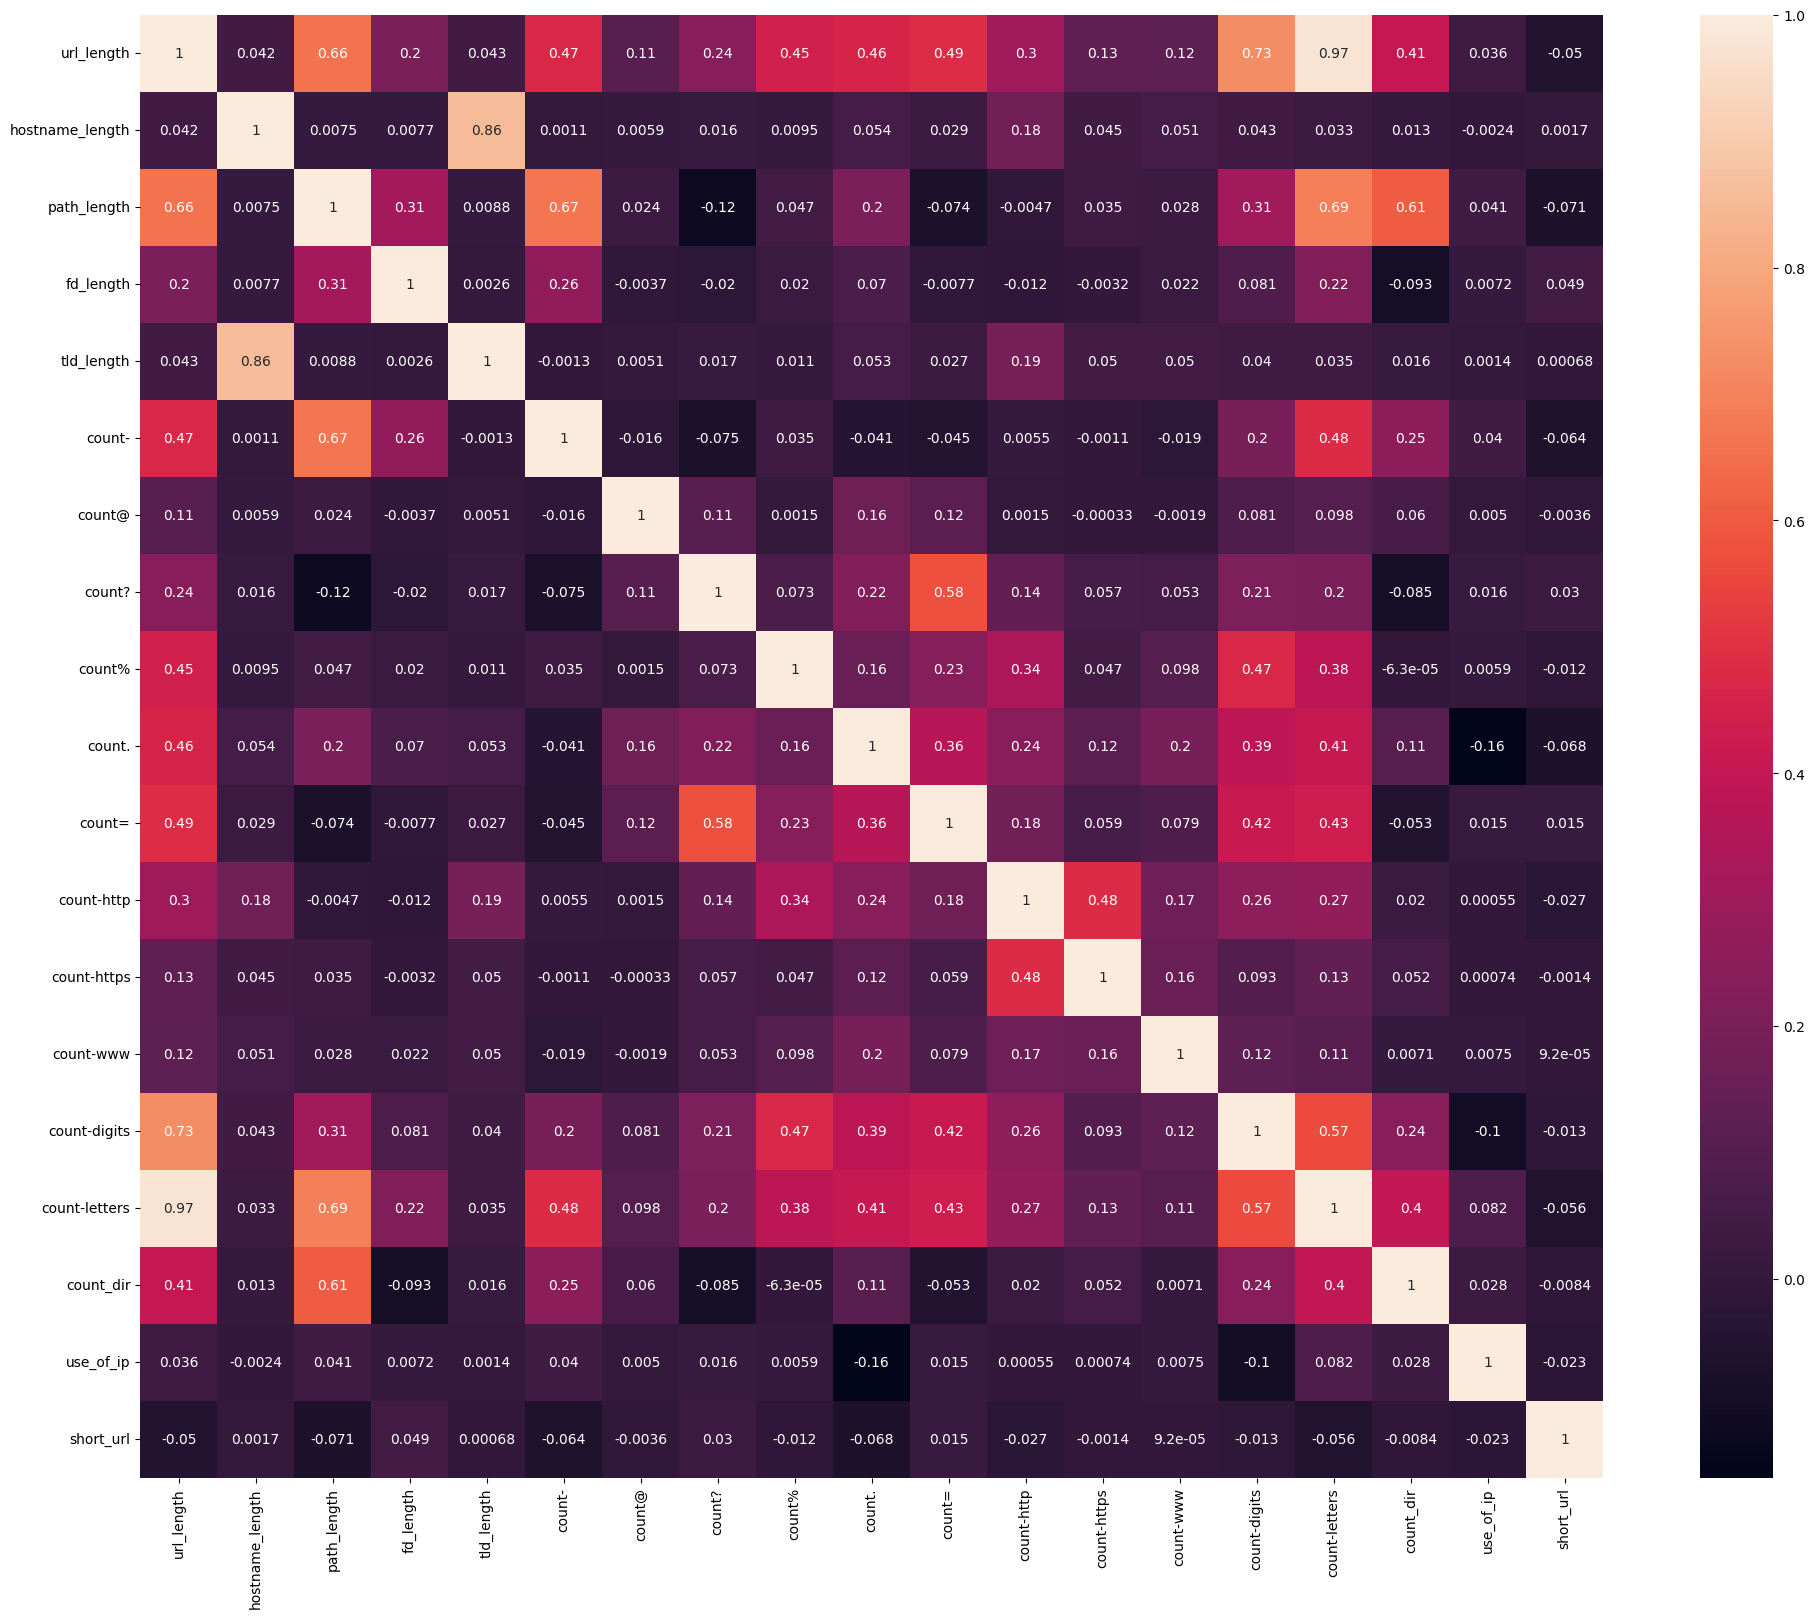

In [20]:
corrmat = urldata.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

<Axes: xlabel='count', ylabel='label'>

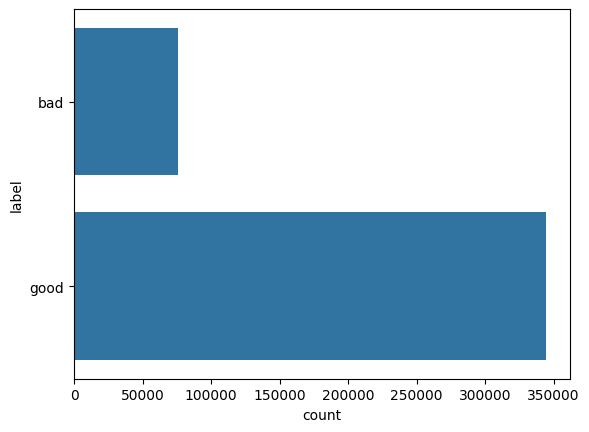

In [21]:
sns.countplot(urldata['label'])

(0.0, 1000.0)

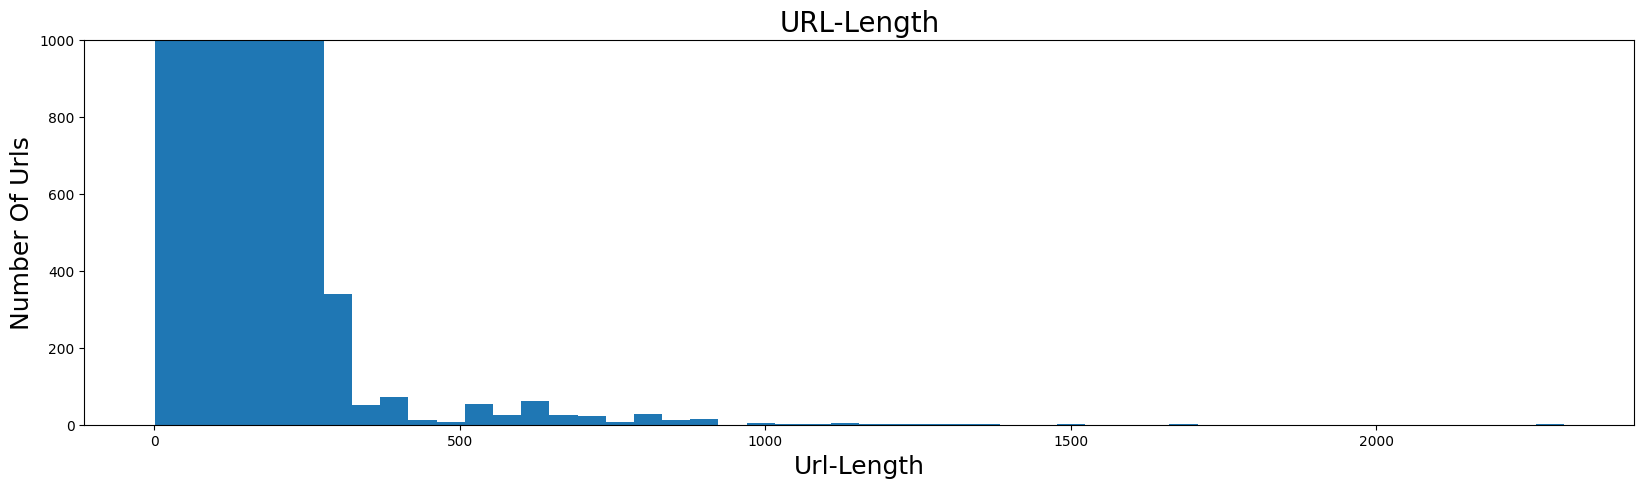

In [22]:
plt.figure(figsize=(20,5))
plt.hist(urldata['url_length'],bins=50)
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

(0.0, 1000.0)

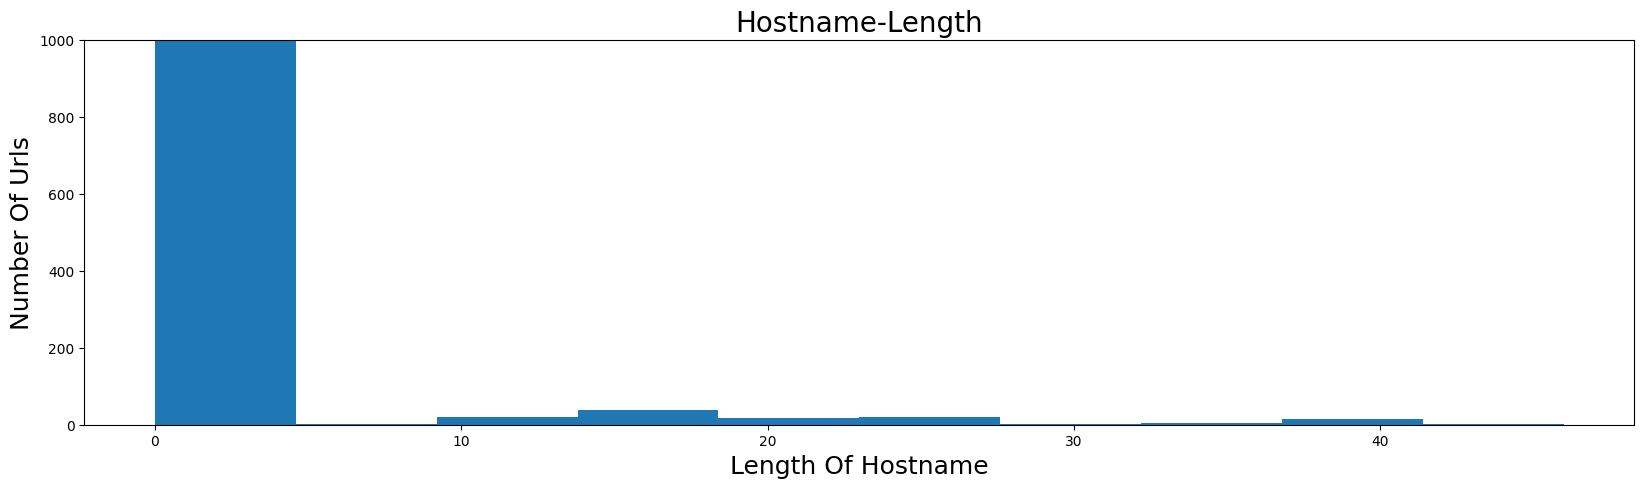

In [23]:
plt.figure(figsize=(20,5))
plt.hist(urldata['hostname_length'])
plt.title("Hostname-Length",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

Text(0, 0.5, 'Number Of URLs')

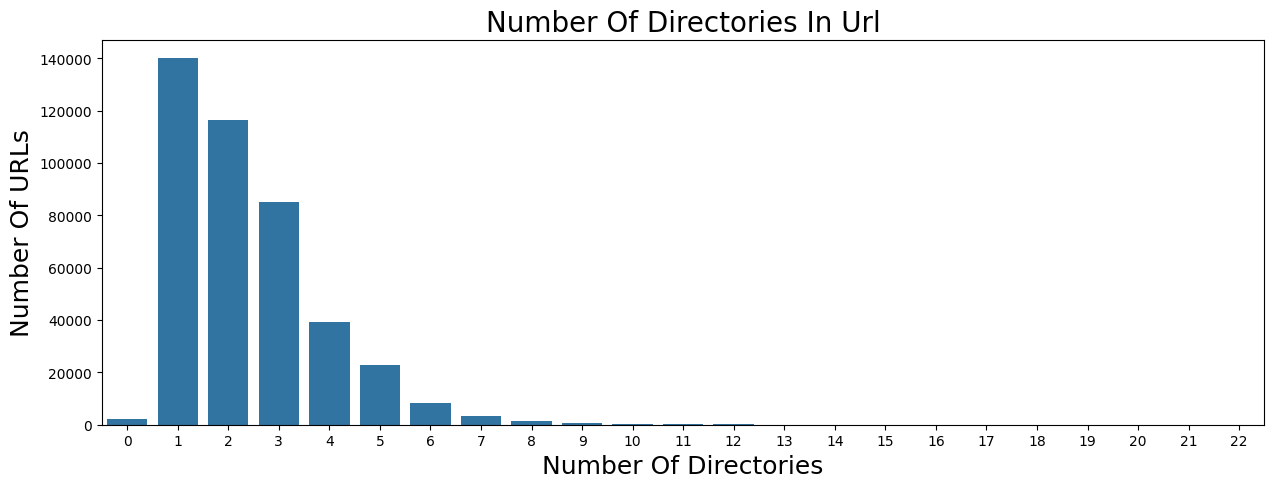

In [24]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata)
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [25]:
urldata['label'] = urldata['label'].replace({'good': 0, 'bad': 1})

In [26]:
#Predictor Variables
X = urldata[['hostname_length',
       'path_length', 'fd_length', 'tld_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]

#Target Variable
y = urldata['label']

In [27]:
print(X.shape)
print(y.shape)

(420464, 17)
(420464,)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
lgs = LogisticRegression(max_iter=1000)
lgs.fit(X_train, y_train)
ypred_lr = lgs.predict(X_test)
lr_acc = accuracy_score(y_test, ypred_lr)
print("Accuracy: {}".format(lr_acc))
#Recall score
print("Recall Score: {}".format(recall_score(y_test, ypred_lr, average='weighted')))
#Precision Score
print('Precision Score: {}'.format(precision_score(y_test, ypred_lr, average='weighted')))
#F1 Score
print('F1 Score: {}'.format(f1_score(y_test, ypred_lr, average='weighted')))
# ROC AUC Score
print('ROC AUC Score: {}'.format(roc_auc_score(y_test, ypred_lr, average='weighted')))

Accuracy: 0.8475970440839208
Recall Score: 0.8475970440839208
Precision Score: 0.8467588407662194
F1 Score: 0.8051891941367647
ROC AUC Score: 0.5900929672790644


In [30]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
ypred_nb = nb.predict(X_test)
nb_acc = accuracy_score(y_test, ypred_nb)
print("Accuracy: {}".format(nb_acc))
#Recall score
print("Recall Score: {}".format(recall_score(y_test, ypred_nb, average='weighted')))
#Precision Score
print('Precision Score: {}'.format(precision_score(y_test, ypred_nb, average='weighted')))
#F1 Score
print('F1 Score: {}'.format(f1_score(y_test, ypred_nb, average='weighted')))
# ROC AUC Score
print('ROC AUC Score: {}'.format(roc_auc_score(y_test, ypred_nb, average='weighted')))

Accuracy: 0.8454327698972225
Recall Score: 0.8454327698972225
Precision Score: 0.8474714351009064
F1 Score: 0.7997191384424853
ROC AUC Score: 0.5810674766961301


In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train,y_train)
ypred_dt = dt.predict(X_test)
dt_acc = accuracy_score(y_test, ypred_dt)
print("Accuracy: {}".format(dt_acc))
#Recall score
print("Recall Score: {}".format(recall_score(y_test, ypred_dt, average='weighted')))
#Precision Score
print('Precision Score: {}'.format(precision_score(y_test, ypred_dt, average='weighted')))
#F1 Score
print('F1 Score: {}'.format(f1_score(y_test, ypred_dt, average='weighted')))
# ROC AUC Score
print('ROC AUC Score: {}'.format(roc_auc_score(y_test, ypred_dt, average='weighted')))

Accuracy: 0.8934273337297205
Recall Score: 0.8934273337297205
Precision Score: 0.8898593579749555
F1 Score: 0.891214428114355
ROC AUC Score: 0.7999697287825936


In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=323)
rf.fit(X_train,y_train)
ypred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, ypred_rf)
print("Accuracy: {}".format(rf_acc))
#Recall score
print("Recall Score: {}".format(recall_score(y_test, ypred_rf, average='weighted')))
#Precision Score
print('Precision Score: {}'.format(precision_score(y_test, ypred_rf, average='weighted')))
#F1 Score
print('F1 Score: {}'.format(f1_score(y_test, ypred_rf, average='weighted')))
# ROC AUC Score
print('ROC AUC Score: {}'.format(roc_auc_score(y_test, ypred_rf, average='weighted')))

Accuracy: 0.9095659560010193
Recall Score: 0.9095659560010193
Precision Score: 0.9056618009752875
F1 Score: 0.906307500030589
ROC AUC Score: 0.8145575697485166


In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
ypred_lda = lda.predict(X_test)
lda_acc = accuracy_score(ypred_lda, y_test)
print("Accuracy: {}".format(lda_acc))
#Recall score
print("Recall Score: {}".format(recall_score(y_test, ypred_lda, average='weighted')))
#Precision Score
print('Precision Score: {}'.format(precision_score(y_test, ypred_lda, average='weighted')))
#F1 Score
print('F1 Score: {}'.format(f1_score(y_test, ypred_lda, average='weighted')))
# ROC AUC Score
print('ROC AUC Score: {}'.format(roc_auc_score(y_test, ypred_lda, average='weighted')))

Accuracy: 0.8464350632803873
Recall Score: 0.8464350632803873
Precision Score: 0.8575134986390689
F1 Score: 0.7988449301571913
ROC AUC Score: 0.5786182240867789


In [34]:
from keras.models import Sequential
from keras.layers import Dense

In [35]:
model = Sequential()
model.add(Dense(16,activation='relu',input_dim=17))
model.add(Dense(1,activation='sigmoid'))
#optimizer=adam
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
3942/3942 [==============================] - 9s 2ms/step - loss: 0.4198 - accuracy: 0.8411
Epoch 2/10
3942/3942 [==============================] - 7s 2ms/step - loss: 0.3753 - accuracy: 0.8514
Epoch 3/10
3942/3942 [==============================] - 8s 2ms/step - loss: 0.3632 - accuracy: 0.8551
Epoch 4/10
3942/3942 [==============================] - 7s 2ms/step - loss: 0.3583 - accuracy: 0.8561
Epoch 5/10
3942/3942 [==============================] - 9s 2ms/step - loss: 0.3562 - accuracy: 0.8557
Epoch 6/10
3942/3942 [==============================] - 11s 3ms/step - loss: 0.3531 - accuracy: 0.8570
Epoch 7/10
3942/3942 [==============================] - 7s 2ms/step - loss: 0.3520 - accuracy: 0.8568
Epoch 8/10
3942/3942 [==============================] - 8s 2ms/step - loss: 0.3500 - accuracy: 0.8571
Epoch 9/10
3942/3942 [==============================] - 8s 2ms/step - loss: 0.3488 - accuracy: 0.8572
Epoch 10/10
3942/3942 [==============================] - 7s 2ms/step - loss: 0.34

In [36]:
Y_pred_nn_o1 = model.predict(X_test)
rounded = [round(x[0]) for x in Y_pred_nn_o1]
Y_pred_nn_o1 = rounded
nn_o1_acc = round(accuracy_score(Y_pred_nn_o1,y_test)*100,2)
print("The accuracy score achieved using Neural Network(Optimizer=Adam) is: "+str(nn_o1_acc)+" %")
#Recall score
print("Recall Score: {}".format(recall_score(y_test,Y_pred_nn_o1,average='weighted')))
#Precision Score
print('Precision Score: {}'.format(precision_score(y_test,Y_pred_nn_o1,average='weighted')))
#F1 Score
print('F1 Score: {}'.format(f1_score(y_test,Y_pred_nn_o1,average='weighted')))
# ROC AUC Score
print('ROC AUC Score: {}'.format(roc_auc_score(y_test,Y_pred_nn_o1,average='weighted')))

9198/9198 [==============================] - 13s 1ms/step
The accuracy score achieved using Neural Network(Optimizer=Adam) is: 85.79 %
Recall Score: 0.8579189671281746
Precision Score: 0.8436950446772783
F1 Score: 0.8367384366117946
ROC AUC Score: 0.6575252602628774


In [37]:
model = Sequential()
model.add(Dense(16,activation='relu',input_dim=17))
model.add(Dense(1,activation='sigmoid'))
#optimizer=Adamax
model.compile(loss='binary_crossentropy',optimizer='Adamax',metrics=['accuracy'])
model.fit(X_train, y_train,epochs=10)

Epoch 1/10
3942/3942 [==============================] - 9s 2ms/step - loss: 0.5603 - accuracy: 0.8184
Epoch 2/10
3942/3942 [==============================] - 7s 2ms/step - loss: 0.3764 - accuracy: 0.8490
Epoch 3/10
3942/3942 [==============================] - 8s 2ms/step - loss: 0.3667 - accuracy: 0.8532
Epoch 4/10
3942/3942 [==============================] - 8s 2ms/step - loss: 0.3605 - accuracy: 0.8547
Epoch 5/10
3942/3942 [==============================] - 8s 2ms/step - loss: 0.3559 - accuracy: 0.8556
Epoch 6/10
3942/3942 [==============================] - 8s 2ms/step - loss: 0.3527 - accuracy: 0.8558
Epoch 7/10
3942/3942 [==============================] - 7s 2ms/step - loss: 0.3496 - accuracy: 0.8568
Epoch 8/10
3942/3942 [==============================] - 8s 2ms/step - loss: 0.3469 - accuracy: 0.8577
Epoch 9/10
3942/3942 [==============================] - 7s 2ms/step - loss: 0.3446 - accuracy: 0.8577
Epoch 10/10
3942/3942 [==============================] - 8s 2ms/step - loss: 0.342

In [38]:
Y_pred_nn_o2 = model.predict(X_test)
rounded = [round(x[0]) for x in Y_pred_nn_o2]
Y_pred_nn_o2 = rounded
nn_o2_acc = round(accuracy_score(Y_pred_nn_o2,y_test)*100,2)
print("The accuracy score achieved using Neural Network(optimizer=Adamax) is: "+str(nn_o2_acc)+" %")
#Recall score
print("Recall Score: {}".format(recall_score(y_test,Y_pred_nn_o2,average='weighted')))
#Precision Score
print('Precision Score: {}'.format(precision_score(y_test,Y_pred_nn_o2,average='weighted')))
#F1 Score
print('F1 Score: {}'.format(f1_score(y_test,Y_pred_nn_o2,average='weighted')))
# ROC AUC Score
print('ROC AUC Score: {}'.format(roc_auc_score(y_test,Y_pred_nn_o2,average='weighted')))

9198/9198 [==============================] - 15s 2ms/step
The accuracy score achieved using Neural Network(optimizer=Adamax) is: 85.97 %
Recall Score: 0.8596585407287862
Precision Score: 0.8518697118563331
F1 Score: 0.8320564937275198
ROC AUC Score: 0.6395603239984813


In [39]:
model = Sequential()
model.add(Dense(16,activation='relu',input_dim=17))
model.add(Dense(1,activation='sigmoid'))
#optimizer=Nadam
model.compile(loss='binary_crossentropy',optimizer='Nadam',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
3942/3942 [==============================] - 9s 2ms/step - loss: 0.4656 - accuracy: 0.8374
Epoch 2/10
3942/3942 [==============================] - 8s 2ms/step - loss: 0.3950 - accuracy: 0.8469
Epoch 3/10
3942/3942 [==============================] - 8s 2ms/step - loss: 0.3939 - accuracy: 0.8469
Epoch 4/10
3942/3942 [==============================] - 9s 2ms/step - loss: 0.3937 - accuracy: 0.8473
Epoch 5/10
3942/3942 [==============================] - 8s 2ms/step - loss: 0.3885 - accuracy: 0.8484
Epoch 6/10
3942/3942 [==============================] - 9s 2ms/step - loss: 0.3854 - accuracy: 0.8485
Epoch 7/10
3942/3942 [==============================] - 9s 2ms/step - loss: 0.3836 - accuracy: 0.8487
Epoch 8/10
3942/3942 [==============================] - 8s 2ms/step - loss: 0.3821 - accuracy: 0.8491
Epoch 9/10
3942/3942 [==============================] - 9s 2ms/step - loss: 0.3809 - accuracy: 0.8491
Epoch 10/10
3942/3942 [==============================] - 9s 2ms/step - loss: 0.380

In [40]:
Y_pred_nn_o3 = model.predict(X_test)
rounded = [round(x[0]) for x in Y_pred_nn_o3]
Y_pred_nn_o3 = rounded
nn_o3_acc = round(accuracy_score(Y_pred_nn_o3,y_test)*100,2)
print("The accuracy score achieved using Neural Network(optimizer=Nadam) is: "+str(nn_o3_acc)+" %")
#Recall score
print("Recall Score: {}".format(recall_score(y_test,Y_pred_nn_o3,average='weighted')))
#Precision Score
print('Precision Score: {}'.format(precision_score(y_test,Y_pred_nn_o3,average='weighted')))
#F1 Score
print('F1 Score: {}'.format(f1_score(y_test,Y_pred_nn_o3,average='weighted')))
# ROC AUC Score
print('ROC AUC Score: {}'.format(roc_auc_score(y_test,Y_pred_nn_o3,average='weighted')))

9198/9198 [==============================] - 13s 1ms/step
The accuracy score achieved using Neural Network(optimizer=Nadam) is: 84.89 %
Recall Score: 0.8489458931453325
Precision Score: 0.858753076528731
F1 Score: 0.8040247365059904
ROC AUC Score: 0.586535007511927


In [41]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
ypred_ada = abc.predict(X_test)
ada_acc = accuracy_score(ypred_ada, y_test)
print("Accuracy: {}".format(ada_acc))
#Recall score
from sklearn.metrics import recall_score
print("Recall Score: {}".format(recall_score(ypred_ada, y_test, average='weighted')))
#Precision Score
from sklearn.metrics import precision_score
print('Precision Score: {}'.format(precision_score(ypred_ada, y_test, average='weighted')))
#F1 Score
from sklearn.metrics import f1_score
print('F1 Score: {}'.format(f1_score(ypred_ada, y_test, average='weighted')))
# ROC AUC Score
from sklearn.metrics import roc_auc_score
print('ROC AUC Score: {}'.format(roc_auc_score(ypred_ada, y_test, average='weighted')))

Accuracy: 0.8577151108468529
Recall Score: 0.8577151108468529
Precision Score: 0.9371087415997443
F1 Score: 0.8861486313491236
ROC AUC Score: 0.8242799575019258


In [42]:
scores = [lr_acc*100, nb_acc*100, dt_acc*100, rf_acc*100,
          lda_acc*100, nn_o1_acc, nn_o2_acc, nn_o3_acc, ada_acc*100]
algorithms = ["Logistic Regression", "Naive Bayes", "Decision Tree", "Random Forest",
              "LDA", "ANN(Adam)", "ANN(Adamax)", "ANN(Nadam)", "AdaBoost"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 84.75970440839208 %
The accuracy score achieved using Naive Bayes is: 84.54327698972224 %
The accuracy score achieved using Decision Tree is: 89.34273337297205 %
The accuracy score achieved using Random Forest is: 90.95659560010193 %
The accuracy score achieved using LDA is: 84.64350632803873 %
The accuracy score achieved using ANN(Adam) is: 85.79 %
The accuracy score achieved using ANN(Adamax) is: 85.97 %
The accuracy score achieved using ANN(Nadam) is: 84.89 %
The accuracy score achieved using AdaBoost is: 85.77151108468529 %


<Figure size 3000x7000 with 0 Axes>

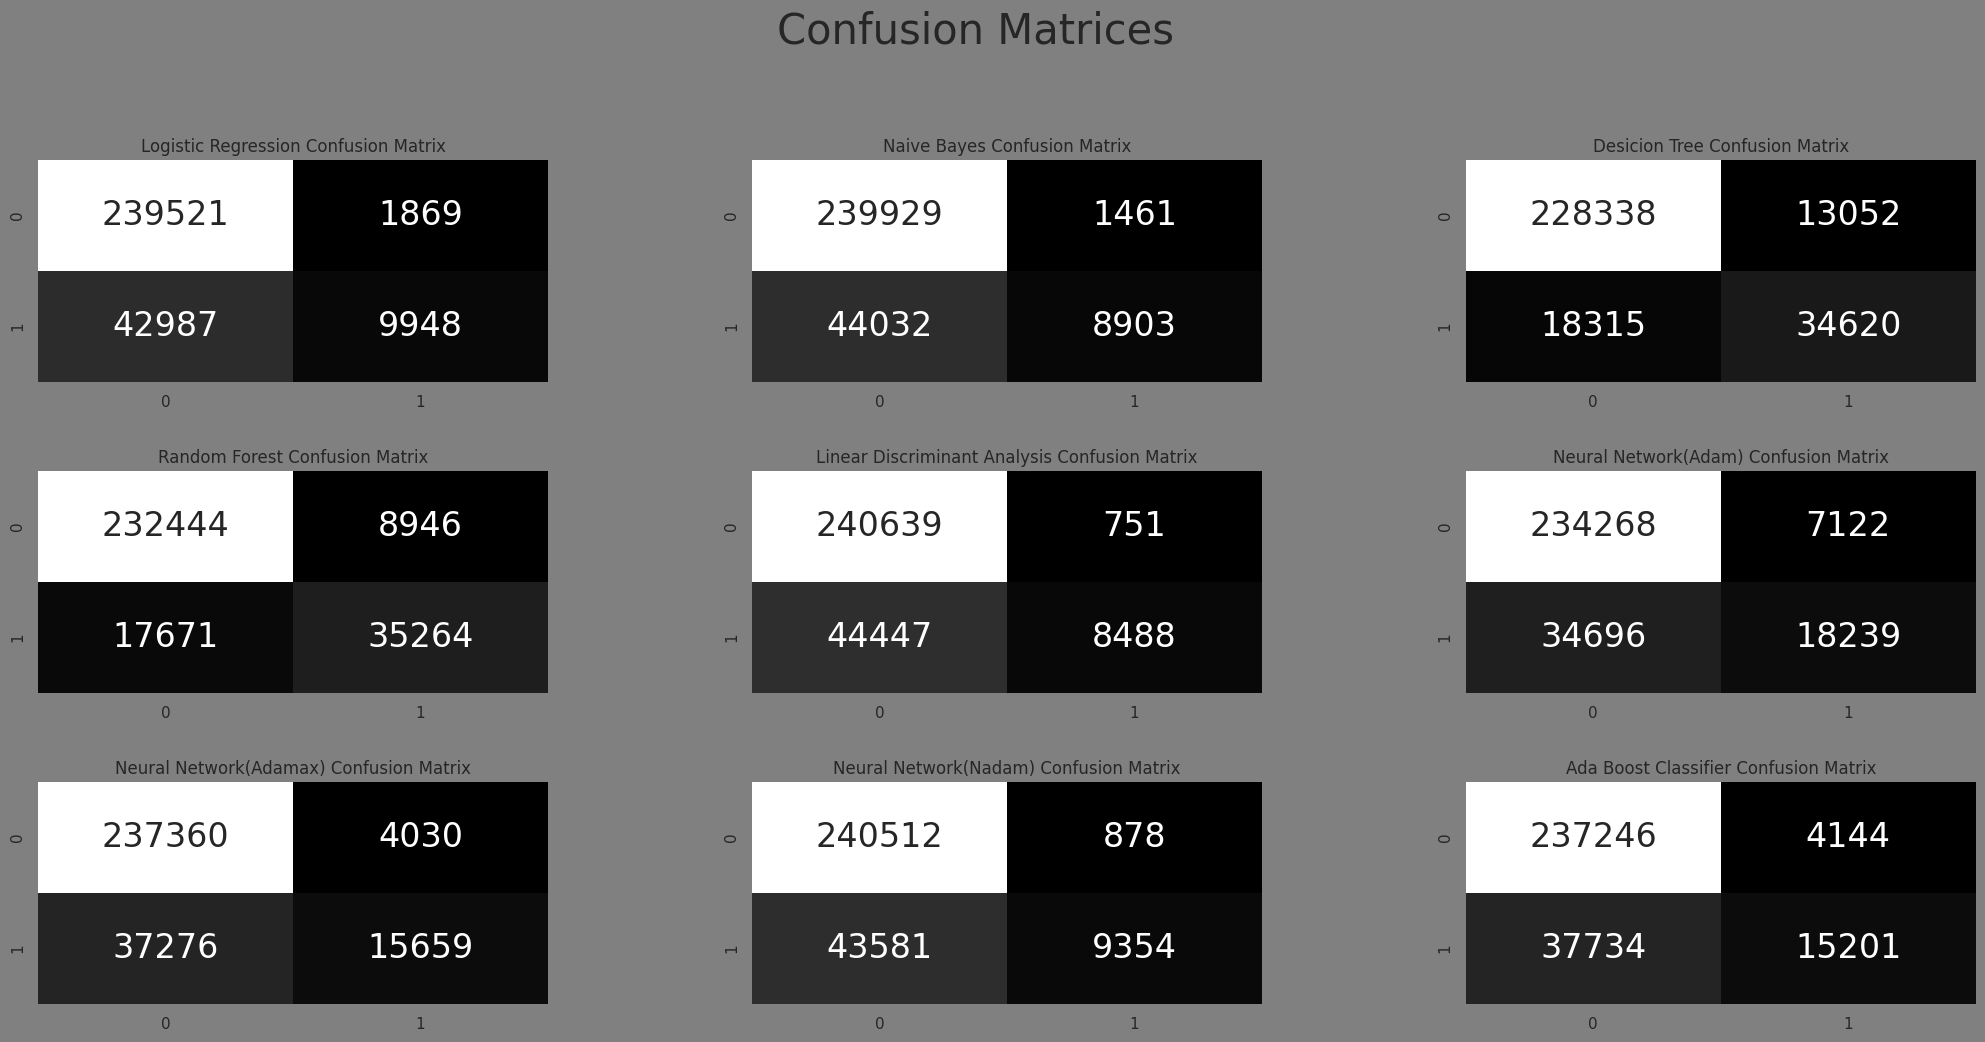

In [45]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, ypred_lr)
cm_nb = confusion_matrix(y_test, ypred_nb)
cm_dt = confusion_matrix(y_test, ypred_dt)
cm_rf = confusion_matrix(y_test, ypred_rf)
cm_lda = confusion_matrix(y_test, ypred_lda)
cm_nn_o1 = confusion_matrix(y_test, Y_pred_nn_o1)
cm_nn_o2 = confusion_matrix(y_test, Y_pred_nn_o2)
cm_nn_o3 = confusion_matrix(y_test, Y_pred_nn_o3)
cm_ada = confusion_matrix(y_test, ypred_ada)


plt.figure(figsize=(30,70))
#plt.rcParams['axes.facecolor'] = 'black'#plt.figure.patch.set_facecolor('black')
fig = plt.figure()
fig.patch.set_facecolor('grey')

plt.suptitle("Confusion Matrices",fontsize=30)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(4,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="gist_gray",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,2)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="gist_gray",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,3)
plt.title("Desicion Tree Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="gist_gray",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,4)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="gist_gray",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,5)
plt.title("Linear Discriminant Analysis Confusion Matrix")
sns.heatmap(cm_lda,annot=True,cmap="gist_gray",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,6)
plt.title("Neural Network(Adam) Confusion Matrix")
sns.heatmap(cm_nn_o1,annot=True,cmap="gist_gray",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,7)
plt.title("Neural Network(Adamax) Confusion Matrix")
sns.heatmap(cm_nn_o2,annot=True,cmap="gist_gray",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,8)
plt.title("Neural Network(Nadam) Confusion Matrix")
sns.heatmap(cm_nn_o3,annot=True,cmap="gist_gray",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,9)
plt.title("Ada Boost Classifier Confusion Matrix")
sns.heatmap(cm_ada,annot=True,cmap="gist_gray",fmt="d",cbar=False, annot_kws={"size": 24})
plt.show()